In [1]:
%run bootstrap.py

In [2]:
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

In [3]:
from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from evaluation.plotting_params import set_rc_params

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
set_rc_params()

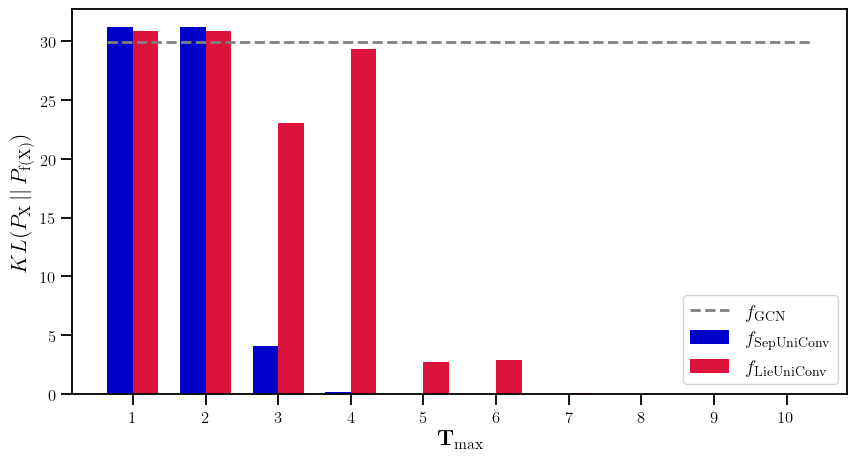

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import json
from pathlib import Path

def load_json_means(json_path):
    """Load a JSON and return truncations and mean values."""
    with open(json_path, "r") as f:
        data = json.load(f)
    truncs = sorted(data.keys(), key=int)
    means = [np.mean(data[t]) for t in truncs]
    return truncs, means

uni_json = Path("output/uni/all_rq_diffs.json")
lieuni_json = Path("output/lieuni/all_rq_diffs.json")
gcn_json = Path("output/gcn/all_rq_diffs.json")

truncations, uni_means = load_json_means(uni_json)
_, lieuni_means = load_json_means(lieuni_json)
_, gcn_means = load_json_means(gcn_json)

gcn_mean = np.mean(gcn_means) if gcn_means else 0

bar_width = 0.35
x = np.arange(len(truncations))

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - bar_width/2, uni_means, width=bar_width, label=r'$f_{\rm SepUniConv}$', color='mediumblue')
ax.bar(x + bar_width/2, lieuni_means, width=bar_width, label=r"$f_{\rm LieUniConv}$", color='crimson')
ax.hlines(gcn_mean, x[0] - bar_width, x[-1] + bar_width, colors='gray', linestyles='dashed', linewidth=2, label=r'$f_{\rm GCN}$')

ax.set_xlabel(r"$\mathbf{T_{\rm max}}$")
ax.set_ylabel(r"$KL(P_{\rm X} \, || \, P_{\rm f(X)}) $")

ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in range(1, 11)], fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', which='both', bottom=True, top=False)
ax.minorticks_off()
ax.legend(loc='lower right')

plt.show()


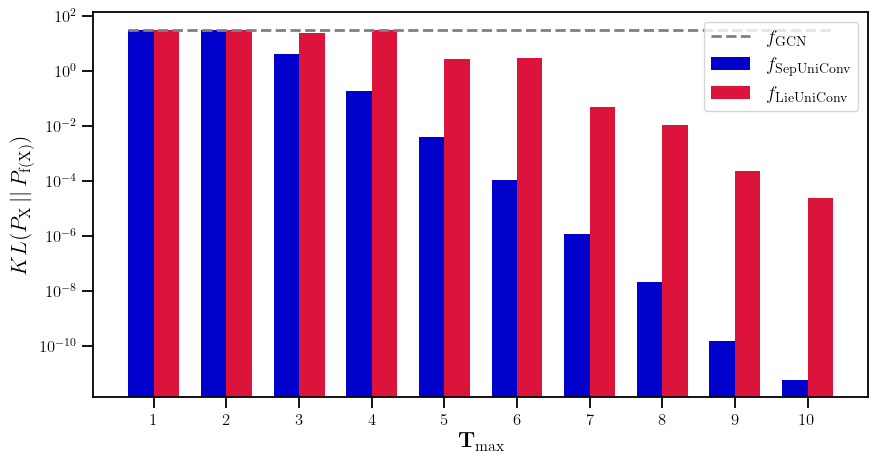

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import json
from pathlib import Path

def load_json_means(json_path):
    """Load a JSON and return truncations and mean values."""
    with open(json_path, "r") as f:
        data = json.load(f)
    truncs = sorted(data.keys(), key=int)
    means = [np.mean(data[t]) for t in truncs]
    return truncs, means

uni_json = Path("output/uni/all_rq_diffs.json")
lieuni_json = Path("output/lieuni/all_rq_diffs.json")
gcn_json = Path("output/gcn/all_rq_diffs.json")

truncations, uni_means = load_json_means(uni_json)
_, lieuni_means = load_json_means(lieuni_json)
_, gcn_means = load_json_means(gcn_json)

gcn_mean = np.mean(gcn_means) if gcn_means else 0

bar_width = 0.35
x = np.arange(len(truncations))

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - bar_width/2, uni_means, width=bar_width, label=r'$f_{\rm SepUniConv}$', color='mediumblue')
ax.bar(x + bar_width/2, lieuni_means, width=bar_width, label=r"$f_{\rm LieUniConv}$", color='crimson')
ax.hlines(gcn_mean, x[0] - bar_width, x[-1] + bar_width, colors='gray', linestyles='dashed', linewidth=2, label=r'$f_{\rm GCN}$')

ax.set_xlabel(r"$\mathbf{T_{\rm max}}$")
ax.set_ylabel(r"$KL(P_{\rm X} \, || \, P_{\rm f(X)})$")
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in range(1, 11)], fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', which='both', bottom=True, top=False)
ax.minorticks_off()
ax.legend(loc='upper right')

plt.show()


### Secret video

In [9]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

data_dir = Path("output")
save_frames_dir = data_dir / "timelapse_frames"
save_frames_dir.mkdir(parents=True, exist_ok=True)

architectures = ["Uni", "LieUni"]
truncations = range(1, 11)

global_x_min = np.inf
global_x_max = -np.inf
global_y_max = -np.inf

for arch in architectures:
    for trunc in truncations:
        x_path = data_dir / f"{arch.lower()}/x_trunc{trunc}_{arch}.npy"
        xprime_path = data_dir / f"{arch.lower()}/xprime_trunc{trunc}_{arch}.npy"
        if not x_path.exists() or not xprime_path.exists():
            continue
        x = np.load(x_path)
        xprime = np.load(xprime_path)
        global_x_min = min(global_x_min, x.min(), xprime.min())
        global_x_max = max(global_x_max, x.max(), xprime.max())
        hist_x, _ = np.histogram(x, bins=50, density=True)
        hist_xp, _ = np.histogram(xprime, bins=50, density=True)
        global_y_max = max(global_y_max, hist_x.max(), hist_xp.max())

for arch in architectures:
    arch_dir = save_frames_dir / arch
    arch_dir.mkdir(parents=True, exist_ok=True)
    
    for trunc in truncations:
        x_path = data_dir / f"{arch.lower()}/x_trunc{trunc}_{arch}.npy"
        xprime_path = data_dir / f"{arch.lower()}/xprime_trunc{trunc}_{arch}.npy"
        if not x_path.exists() or not xprime_path.exists():
            continue

        x = np.load(x_path)
        xprime = np.load(xprime_path)

        plt.figure(figsize=(8, 5))
        plt.hist(x, bins=50, density=True, alpha=0.5,
                 color='mediumblue', label=r'$P_{(\mathbf{X})}$')
        plt.hist(xprime, bins=50, density=True, alpha=0.5,
                 color='crimson', label=r"$P_{f(\mathbf{X})}$")
        plt.xlabel("Rayleigh quotient")
        plt.ylabel("Density")
        plt.title(f"Rayleigh quotient distributions, {arch}, truncation={trunc}")
        plt.xlim(global_x_min, global_x_max)
        plt.ylim(0, global_y_max * 1.05)
        plt.legend()
        plt.tight_layout()

        plt.savefig(arch_dir / f"frame_trunc_{trunc:02d}.png")
        plt.close()


In [11]:
import imageio
from pathlib import Path

save_frames_dir = Path("output/timelapse_frames")
gif_dir = save_frames_dir / "gifs"
gif_dir.mkdir(exist_ok=True)

architectures = ["Uni", "LieUni"]

for arch in architectures:
    frame_files = sorted((save_frames_dir / arch).glob("frame_trunc_*.png"))
    images = [imageio.imread(f) for f in frame_files]
    gif_path = gif_dir / f"{arch}_timelapse.gif"
    
    fps = 1 
    imageio.mimsave(gif_path, images, fps=fps)

/var/folders/f1/1727nmns4pn3qwy09yz08x2r0000gn/T/ipykernel_98002/4229475903.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f) for f in frame_files]
